# Introduction

You are working for a consumer finance company. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision -

*	If the applicant is likely to repay the loan, then not approving the loan to the person results in a loss of business to the company.
*	If the applicant is not likely to repay the loan i.e. default, then approving the loan to the person results in a financial loss to the company.

In this case study, we consider only consumers whose loan application is approved.  Here, our aim is to understand how consumer attributes and loan attributes influencing the tendency of defaulting.


## Business Understanding
This company is the largest online credit marketplace, facilitating personal loans, business loans, and financing for elective medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Investors provide the capital to enable many of the loans in exchange for earning interest. 

## Data Understanding
The company has come across some important attributes in order to understand behaviour of their approved loan customers w.r.t. loan default. Thus, the lending company has decided to work only on these variables to mitigate the future risk. The driver variables you need to consider for this case study are :

| Attributes  | Definition    |
|------|------|
|annual_inc| Annual Income of applicant|
|loan_amnt| The listed amount of the loan applied for by the borrower|
|funded_amnt|The total amount committed to that loan at that point in time|
|int_rate|Interest Rate on the loan|
|grade|Lending Club assigned loan grade|
|dti|Debt to income ratio|
|emp_length|Employment length in years|
|purpose|A category provided by the borrower for the loan request.|
|home_ownership|The home ownership status provided by the borrower during registration|
|loan_status|Current status of loan|

# Business Objective

The business objectives and goals of data analysis are pretty simple. The company wants to understand the driving factors behind loan default (loan_status_1).  The company can utilise this knowledge for its portfolio and risk assessment. Specifically, the company wants to determine which driver variables are having the most influence on the tendency of loan default.

Your goal is divided into 3 main parts:
1.	Data Preparation
2.	Exploratory Data Analysis
3.	Hypothesis testing


# 1: Data Prepration

In [138]:
import pandas as pd
import numpy as np

%matplotlib inline

In [139]:
loan = pd.read_csv('loan.csv',low_memory=False,
                   dtype={'annual_inc':float,'loan_amnt':float,'funded_amnt':float,'int_rate':object ,'grade':object ,
                         'dti':float,'emp_length':object ,'purpose':object ,'home_ownership':object ,'loan_status':object })

https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [140]:
col_needed = ['annual_inc', 'loan_amnt', 'funded_amnt', 'int_rate','grade','dti','emp_length','purpose','home_ownership','loan_status']

In [141]:
loan = loan[col_needed]

In [142]:
loan.shape

(42542, 10)

In [143]:
loan.head()

,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status
0,24000.0,5000.0,5000.0,10.65%,B,27.65,10+ years,credit_card,RENT,Fully Paid
1,30000.0,2500.0,2500.0,15.27%,C,1.00,< 1 year,car,RENT,Charged Off
2,12252.0,2400.0,2400.0,15.96%,C,8.72,10+ years,small_business,RENT,Fully Paid
3,49200.0,10000.0,10000.0,13.49%,C,20.00,10+ years,other,RENT,Fully Paid
4,80000.0,3000.0,3000.0,12.69%,B,17.94,1 year,other,RENT,Current


### Find the Missing values in each column

In [144]:
loan.isnull().sum()

annual_inc          11
loan_amnt            7
funded_amnt          7
int_rate             7
grade                7
dti                  7
emp_length        1119
purpose              7
home_ownership       7
loan_status          7
dtype: int64

Here we can say that annual_inc has more nulls and lets explore more

In [145]:
loan[loan['annual_inc'].isnull()==True]

,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status
39786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42452,NaN,5000.0,5000.0,7.43%,A,1.0,< 1 year,other,NONE,Does not meet the credit policy. Status:Fully ...
42453,NaN,7000.0,7000.0,7.75%,A,1.0,< 1 year,other,NONE,Does not meet the credit policy. Status:Fully ...
42483,NaN,6700.0,6700.0,7.75%,A,1.0,< 1 year,other,NONE,Does not meet the credit policy. Status:Fully ...
42536,NaN,6500.0,6500.0,8.38%,A,4.0,< 1 year,other,NONE,Does not meet the credit policy. Status:Fully ...
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clearly see that most of the missing values are there in these 11 observations 
Let's remove these

In [146]:
#Remove all rows having na's
loan.dropna(inplace=True)
print('Shape:',loan.shape)
print('Missing values:', loan.isnull().sum())

Shape: (41419, 10)
Missing values: annual_inc        0
loan_amnt         0
funded_amnt       0
int_rate          0
grade             0
dti               0
emp_length        0
purpose           0
home_ownership    0
loan_status       0
dtype: int64


In [147]:
loan.describe()

,annual_inc,loan_amnt,funded_amnt,dti
count,4.141900e+04,41419.000000,41419.000000,41419.000000
mean,6.975817e+04,11158.507569,10887.851590,13.383049
std,6.455139e+04,7416.376426,7152.797756,6.716461
min,1.896000e+03,500.000000,500.000000,0.000000
25%,4.100000e+04,5400.000000,5200.000000,8.220000
50%,6.000000e+04,10000.000000,9600.000000,13.480000
75%,8.338700e+04,15000.000000,15000.000000,18.680000
max,6.000000e+06,35000.000000,35000.000000,29.990000


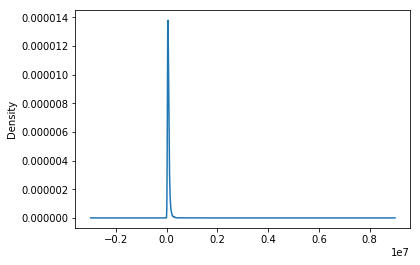

In [148]:
loan['annual_inc'].plot(kind='kde') 

### Spread is more, Skewed to right

In [149]:
loan.describe(include = ['O'])

,int_rate,grade,emp_length,purpose,home_ownership,loan_status
count,41419,41419,41419,41419,41419,41419
unique,394,7,11,14,5,9
top,10.99%,B,10+ years,debt_consolidation,RENT,Fully Paid
freq,946,12045,9369,19363,19755,32145


In [150]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

### We will be removing all the values having status = Fully Paid because we are not dealing with fully paid loans data

In [151]:
loan =loan.drop(loan[(loan['loan_status']=='Fully Paid') 
               | (loan['loan_status']=='Does not meet the credit policy. Status:Fully Paid')].index)

In [152]:
loan.shape

(7309, 10)

In [153]:
loan['loan_status'].unique()

array(['Charged Off', 'Current', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

### Remove % symbol from "int_rate" variable

In [154]:
loan['int_rate'] = loan['int_rate'].str.replace('%','0').apply(pd.to_numeric)
loan['int_rate'].dtype

dtype('float64')

#### Convert grade variable to category

In [155]:
loan['grade'] = loan['grade'].astype('category')

#### Clean Employment Length

In [156]:
print(loan['emp_length'].unique())
loan['emp_length']=loan['emp_length'].replace('[^0-9]','',regex=True)
print(loan['emp_length'].unique())

['< 1 year' '1 year' '4 years' '3 years' '10+ years' '9 years' '2 years'
 '8 years' '7 years' '5 years' '6 years']
['1' '4' '3' '10' '9' '2' '8' '7' '5' '6']


In [157]:
loan['emp_length'].value_counts()

10    1898
1     1456
2      753
3      713
4      620
5      600
6      413
7      359
8      285
9      212
Name: emp_length, dtype: int64

Eariler in employment length has NA's in field where we got " ". Reverting back to NA's

In [158]:
loan['emp_length'] = loan[loan['emp_length']!='']['emp_length']

In [159]:
loan['emp_length'].value_counts()

10    1898
1     1456
2      753
3      713
4      620
5      600
6      413
7      359
8      285
9      212
Name: emp_length, dtype: int64

In [160]:
loan.shape

(7309, 10)

#### Convert "home_ownership", "loan_status" & "purpose"  variable to category

In [161]:
loan["home_ownership"] = loan['home_ownership'].astype('category')
loan["purpose"]=loan['purpose'].astype('category')
loan["loan_status"]=loan['loan_status'].astype('category')

#### Let's check the NA's again because there might be some chances of coersion after changing class of variables 

In [162]:
loan.isnull().sum()

annual_inc        0
loan_amnt         0
funded_amnt       0
int_rate          0
grade             0
dti               0
emp_length        0
purpose           0
home_ownership    0
loan_status       0
dtype: int64

You can see that the emp_length variable contain all the 288 NA's in total 7597 observation. We cann't replace NA's with mean or mode beacuse all the obsevations of emp_length(industry experience) -are independent to each other.
In this case we can safely remove this observations from the loan dataset

In [163]:
loan.dropna(inplace=True)

In [164]:
loan.isnull().sum()

annual_inc        0
loan_amnt         0
funded_amnt       0
int_rate          0
grade             0
dti               0
emp_length        0
purpose           0
home_ownership    0
loan_status       0
dtype: int64

### Create a new column named loan_status_1  with three levels current_new, default_new and late such that
#### rows with loan_status as "current" or "in grace period" are tagged as  "current_new"
#### rows with loan_status as " default" or "charged off" are tagged as "default_new"
#### rows with loan_status as " late 16- 30 days" "late 31-120 days" are tagged as "late"

In [165]:
loan['loan_status_1'] = None
loan.loc[(loan['loan_status'] == "Default") | (loan['loan_status'] == "Charged Off") |
        (loan['loan_status']=="Does not meet the credit policy. Status:Charged Off"),'loan_status_1'] = "default_new"
loan.loc[(loan['loan_status'] == "Current") | (loan['loan_status'] == "In Grace Period"), 'loan_status_1'] = "current_new"
loan.loc[(loan['loan_status'] == "Late (31-120 days)") | (loan['loan_status'] == "Late (16-30 days)"),'loan_status_1'] = "late"

In [166]:
loan['loan_status_1'] = loan['loan_status_1'].astype('category')
loan['loan_status_1'].unique()

[default_new, current_new, late]
Categories (3, object): [default_new, current_new, late]

#### Create new bin variable for int_rate and emp_length respectively as followes

In [167]:
loan['int_rate_group'] = None
loan.loc[loan['int_rate'] < 10,'int_rate_group'] = 'Low'
loan.loc[(loan['int_rate'] >= 10) & (loan['int_rate']<=18),'int_rate_group'] = 'Medium'
loan.loc[(loan['int_rate'] > 18),'int_rate_group'] = "High"
loan['int_rate_group'] = loan['int_rate_group'].astype('category')


loan['emp_length'] = loan['emp_length'].astype('int')
loan['emp_lenght_group'] = None
loan.loc[loan['emp_length'] <= 4, 'emp_lenght_group'] = 'Junior'
loan.loc[loan['emp_length'] > 8, 'emp_lenght_group'] = 'Senior'
loan.loc[loan['emp_lenght_group'].isnull(),'emp_lenght_group'] = "Mid-level"
loan['emp_lenght_group'] = loan['emp_lenght_group'].astype('category')

# 2: Exploratory Data Analysis

### Univariate Analysis
1. Summary Statistics
2. Distribution plot
3. Outlier treatment

### Outlier Detection: Lets plot the density curve for driving variables to know the distribution

count     7309.000000
mean     12771.056232
std       8297.718492
min        500.000000
25%       6000.000000
50%      11000.000000
75%      18000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


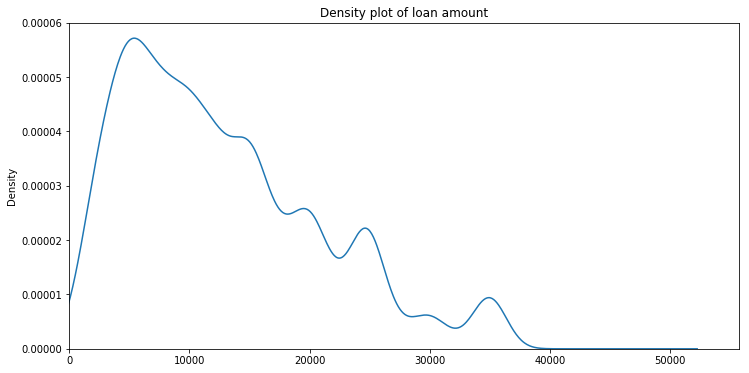

In [168]:
loan['loan_amnt'].plot(kind='kde',title='Density plot of loan amount',figsize=(12, 6),xlim=0,ylim=0)
print(loan['loan_amnt'].describe())

### (The density of obsevations are spread over the range from 0 - 35000. Here we could not see any kind of outlier as such)

### (Let's do the boxplot for same)

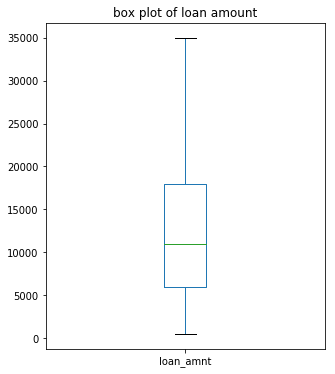

In [169]:
loan['loan_amnt'].plot(kind='box',title='box plot of loan amount',figsize=(5, 6))

count     7309.000000
mean     12383.633192
std       7946.575656
min        500.000000
25%       6000.000000
50%      10500.000000
75%      17000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


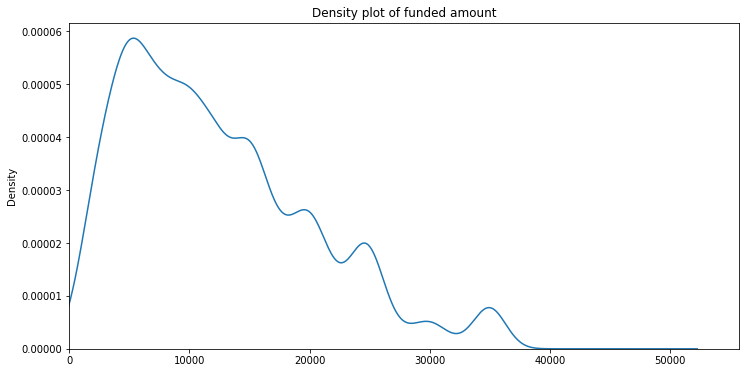

In [170]:
loan['funded_amnt'].plot(kind='kde',title='Density plot of funded amount',figsize=(12, 6),xlim=0,ylim=0)
print(loan['funded_amnt'].describe())

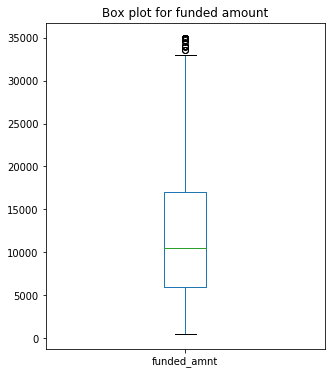

In [171]:
loan['funded_amnt'].plot(kind='box',title='Box plot for funded amount',figsize=(5,6))

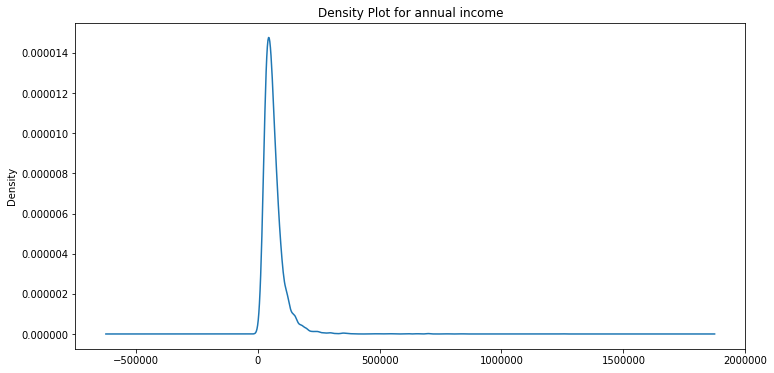

In [172]:
loan['annual_inc'].plot(kind='kde',figsize=(12,6),title='Density Plot for annual income')

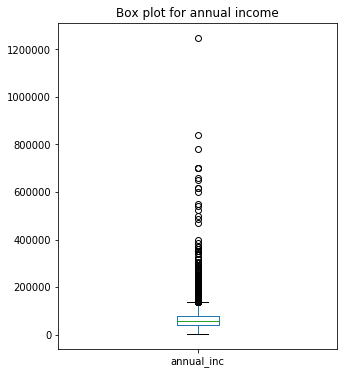

In [173]:
loan['annual_inc'].plot(kind='box',figsize=(5,6),title='Box plot for annual income')

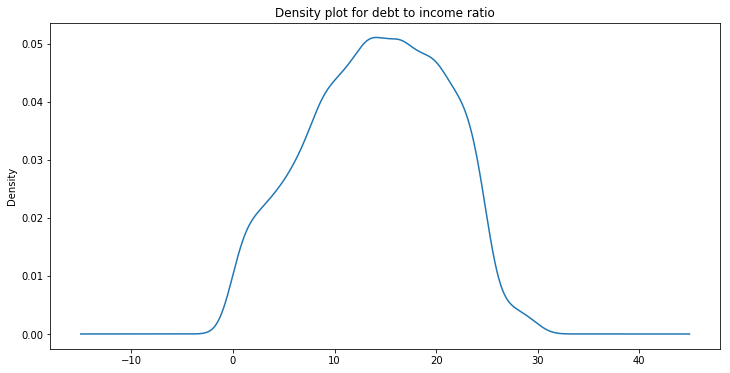

In [174]:
loan['dti'].plot(kind='kde',figsize=(12,6),title='Density plot for debt to income ratio')

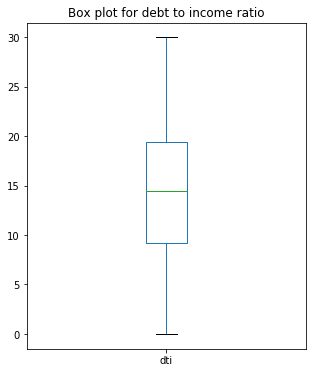

In [175]:
loan['dti'].plot(kind='box',figsize=(5,6), title='Box plot for debt to income ratio')

#### No outliers present in debt to income ratio

### Annual income, Funded Amount has outliers, Lets treat them

### Outlier Treatment
 Yes,we need to cap the outlier values with (Q3+ 1.5*IQR) value


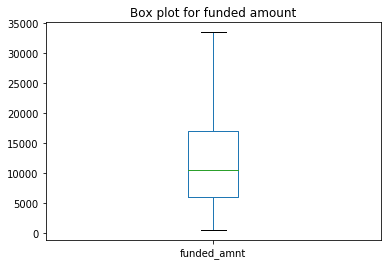

In [176]:
Q1 = loan['funded_amnt'].quantile(.25)
Q3 = loan['funded_amnt'].quantile(.75)
IQR = Q3 - Q1
uppercap  = Q3 + 1.5*IQR
loan.loc[loan['funded_amnt']>uppercap,'funded_amnt'] = uppercap
loan['funded_amnt'].plot(kind='box',title='Box plot for funded amount')

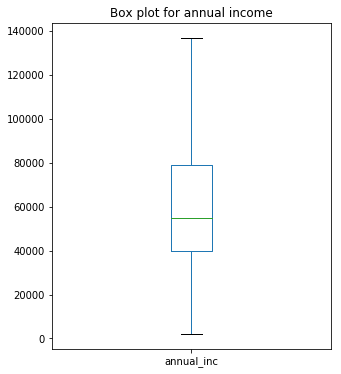

In [177]:
Q1 = loan['annual_inc'].quantile(.25)
Q3 = loan['annual_inc'].quantile(.75)
IQR = Q3 - Q1
uppercap = Q3 + 1.5 * IQR
loan.loc[loan['annual_inc']>uppercap,'annual_inc'] = uppercap
loan['annual_inc'].plot(kind='box',title='Box plot for annual income',figsize=(5,6))

## Let's also explore categorical varriables - Univariate Analysis 

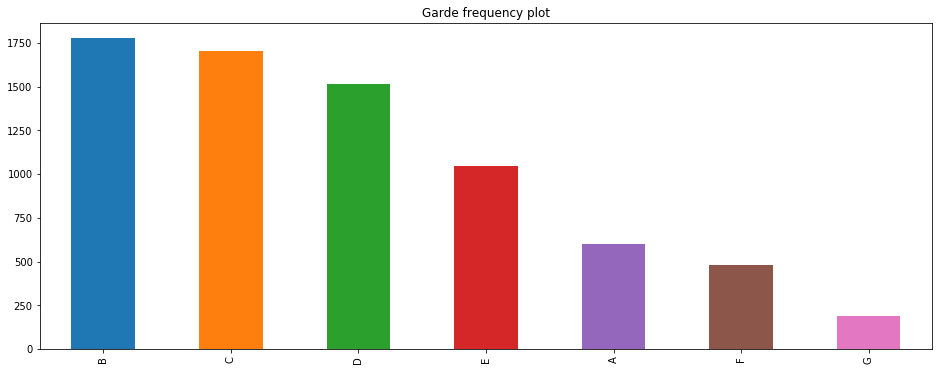

In [178]:
loan['grade'].value_counts().plot(kind='bar',title='Garde frequency plot',figsize=(16,6))

#### You can see, maximum number of loans are passed under B grade and very few are passed under G grade.

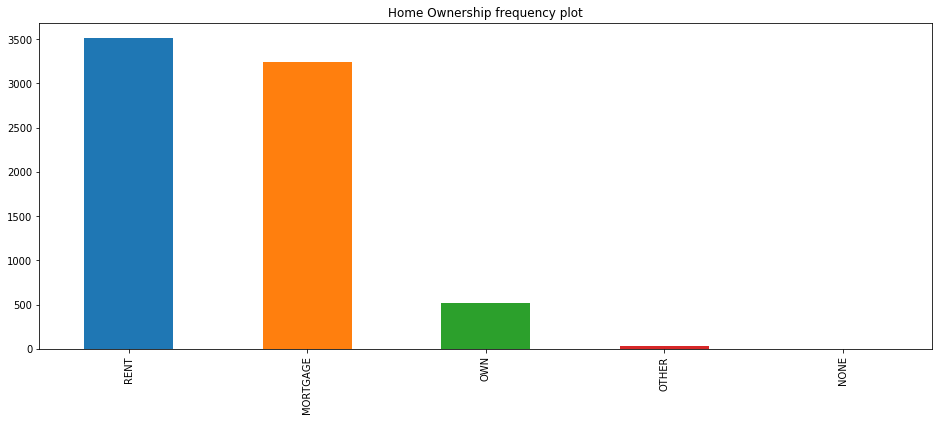

In [179]:
loan['home_ownership'].value_counts().plot(kind='bar',title="Home Ownership frequency plot",figsize=(16,6))

#### you can see, the maximum number of loan seekers had taken the loan followed by them who mortaged their homes.

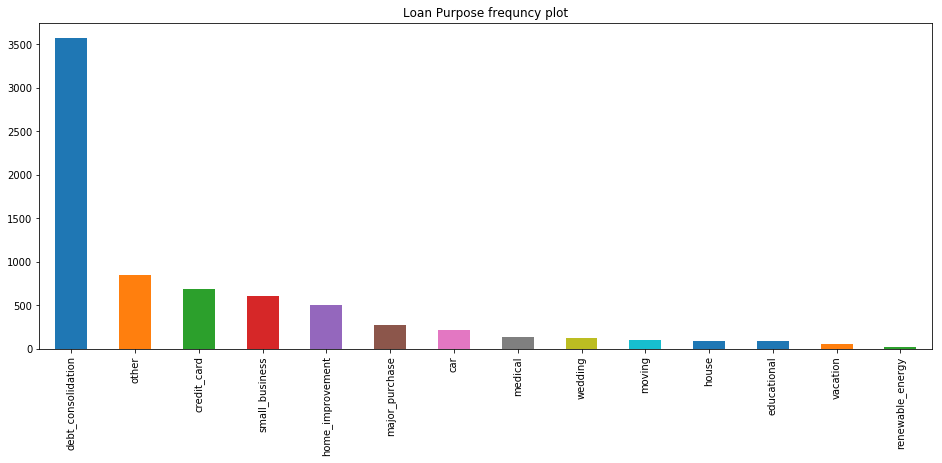

In [180]:
loan['purpose'].value_counts().plot(kind='bar',title="Loan Purpose frequncy plot",figsize=(16,6))

#### You can see that the highest number of bank customers have taken loan for debt consolidation. Debt consolidation is taking one loan to payoff all other loans.This means servicing only one loan and results in lower rate of interest for the consumer.

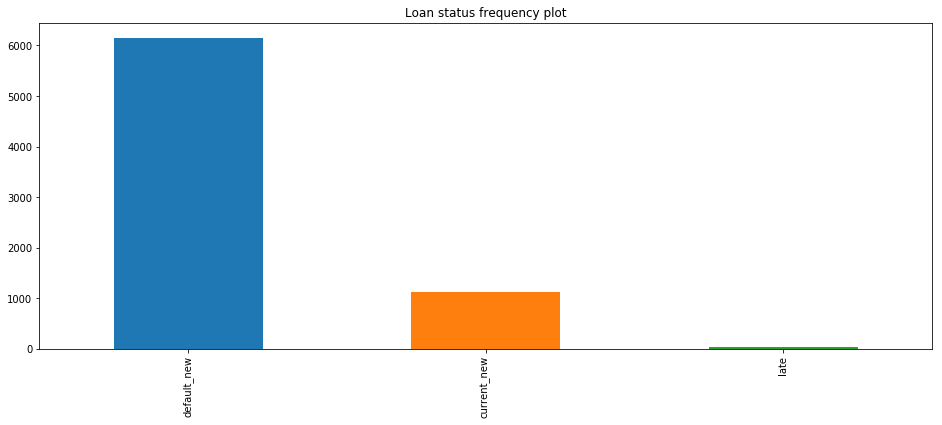

In [181]:
loan['loan_status_1'].value_counts().plot(kind='bar',title='Loan status frequency plot',figsize=(16,6))

#### In the above plot, you can outline that the most of the loans were in new_defaulter categories.

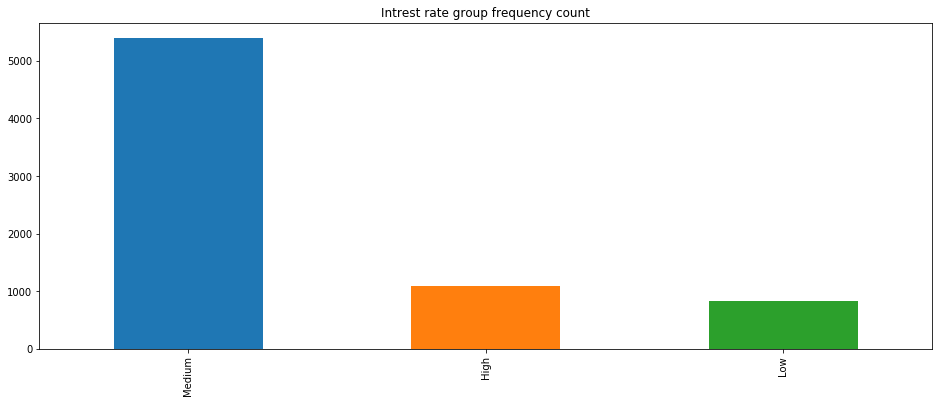

In [182]:
loan['int_rate_group'].value_counts().plot(kind='bar',title='Intrest rate group frequency count',figsize=(16,6))

#### Maximum loan seekers are taken loan at medium intrest rates.

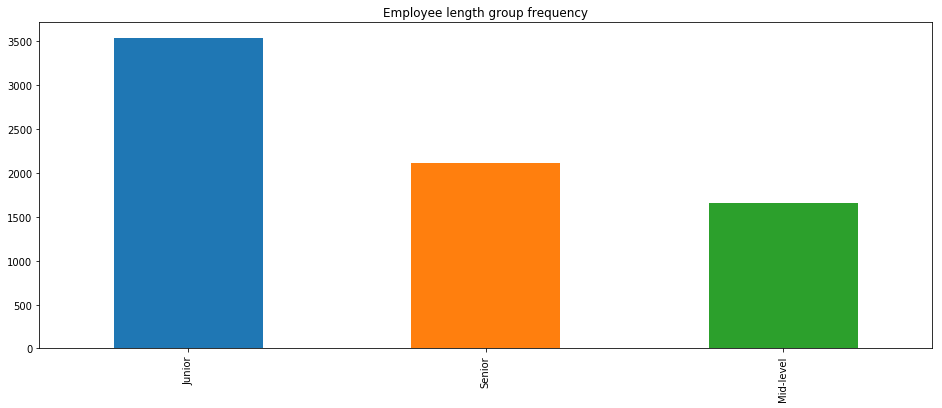

In [183]:
loan['emp_lenght_group'].value_counts().plot(kind='bar',title='Employee length group frequency',figsize=(16,6))

#### Maximum loan given to employees at junior level, Under univariate analysis, we had tried to cover most of the analysis, but yes its a very subjective call to whom you need to explore thoughly

# 2:  Multivariate analysis

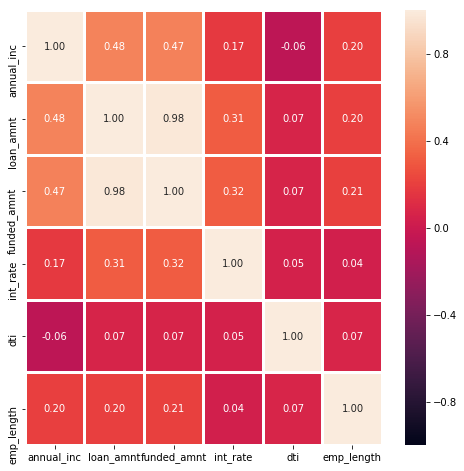

In [184]:
import seaborn as sns
import matplotlib.pyplot as plot
corr_mat = loan.corr()
plot.figure(figsize=(8, 8))
sns.heatmap(corr_mat,annot=True, fmt=".2f",vmin=-1,vmax=1,linewidths=2)

### From the correlation matrix and the correlation values it is clear that  
#### 1.) maximum correlation is observed between the funded amount-loan amount applied
#### 2.) Low correlation is observed between dti and the other continuous variables.


## Distribution of all the driver variables across different levels of two categorical variables:

#### loan_status_1: Make plots to show how the continuous variables vary across the three levels of loan_status_1; 
for e.g. how annual_inc is distributed across the levels


#### 1. loan amount V/s loan_status_1 

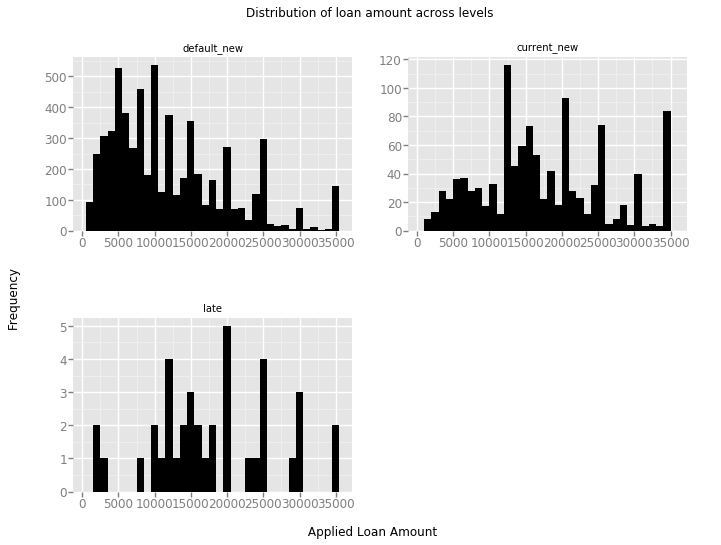

<ggplot: (-9223371949341368281)>

In [185]:
from ggplot import *
p = ggplot(aes(x="loan_amnt"), data=loan) + geom_histogram(binwidth = 1000, fill = "black") + \
                        facet_wrap("loan_status_1", scales="free_y") +\
    xlab(" Applied Loan Amount") + ylab("Frequency") + ggtitle("Distribution of loan amount across levels")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Loan Amount')

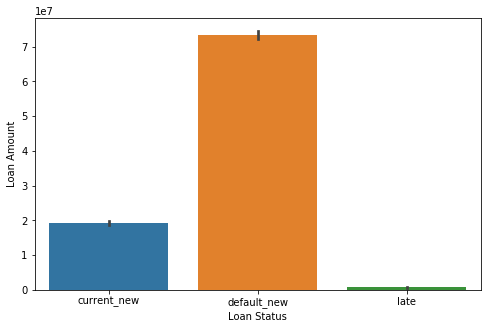

In [186]:
plot.figure(figsize=(8, 5))
sns.barplot(x="loan_status_1", y="loan_amnt", data=loan,estimator=sum)
plot.xlabel("Loan Status")
plot.ylabel("Loan Amount")

#### 2. funded loan V/s loan_status_1

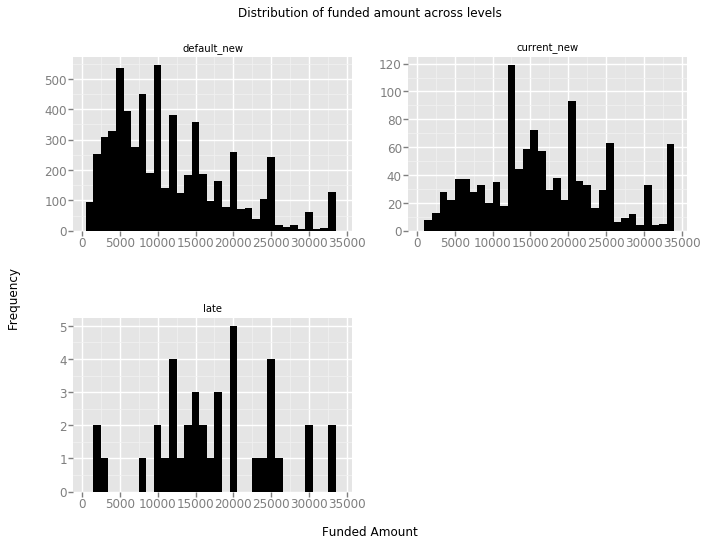

<ggplot: (-9223371949339936382)>

In [187]:
from ggplot import *
p = ggplot(aes(x="funded_amnt"), data=loan) + geom_histogram(binwidth = 1000, fill = "black") + \
                        facet_wrap("loan_status_1", scales="free_y") +\
    xlab("Funded Amount") + ylab("Frequency") + ggtitle("Distribution of funded amount across levels")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Funded Amount')

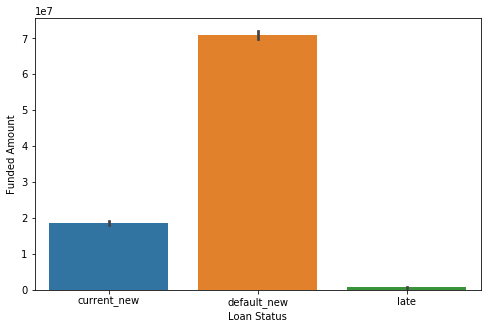

In [188]:
plot.figure(figsize=(8, 5))
sns.barplot(x="loan_status_1", y="funded_amnt", data=loan,estimator=sum)
plot.xlabel("Loan Status")
plot.ylabel("Funded Amount")

#### 3. Annual Income v/s loan_status_1

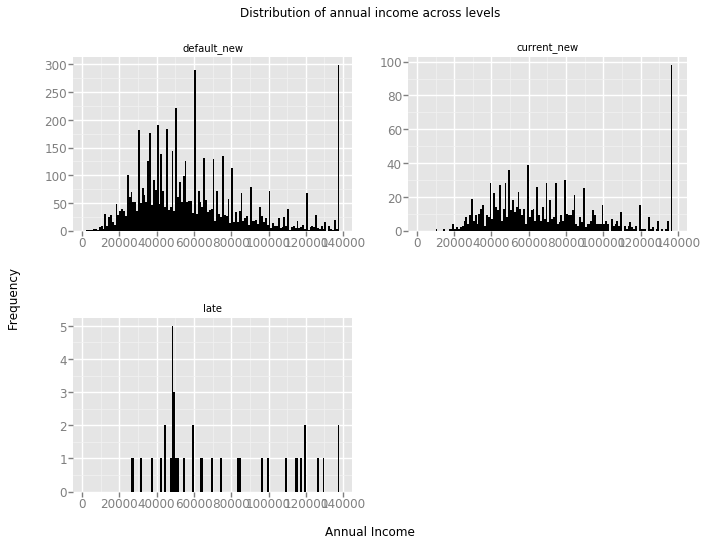

<ggplot: (-9223371949339644328)>

In [189]:
from ggplot import *
p = ggplot(aes(x="annual_inc"), data=loan) + geom_histogram(binwidth = 1000, fill = "black") + \
                        facet_wrap("loan_status_1", scales="free_y") +\
    xlab("Annual Income") + ylab("Frequency") + ggtitle("Distribution of annual income across levels")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Annual Income')

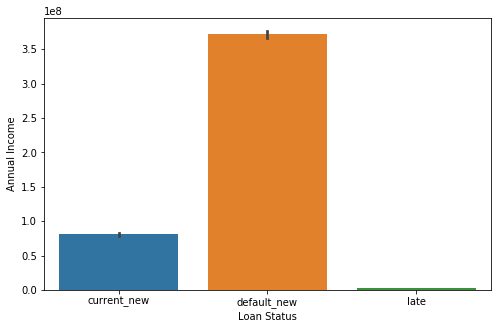

In [190]:
plot.figure(figsize=(8, 5))
sns.barplot(x="loan_status_1", y="annual_inc", data=loan,estimator=sum)
plot.xlabel("Loan Status")
plot.ylabel("Annual Income")

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


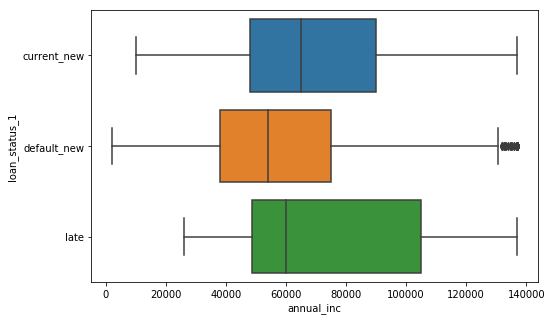

In [191]:
plot.figure(figsize=(8, 5))
sns.boxplot(x="annual_inc", y="loan_status_1", data=loan)

### Even you can also check the boxplot to compare the median of each levels among themselves. (Insights: You can see (Check the plot) that the Late category doesn't contain any outliers but in default category contains most of the outliers

#### 4. dti V/s loan_status_1

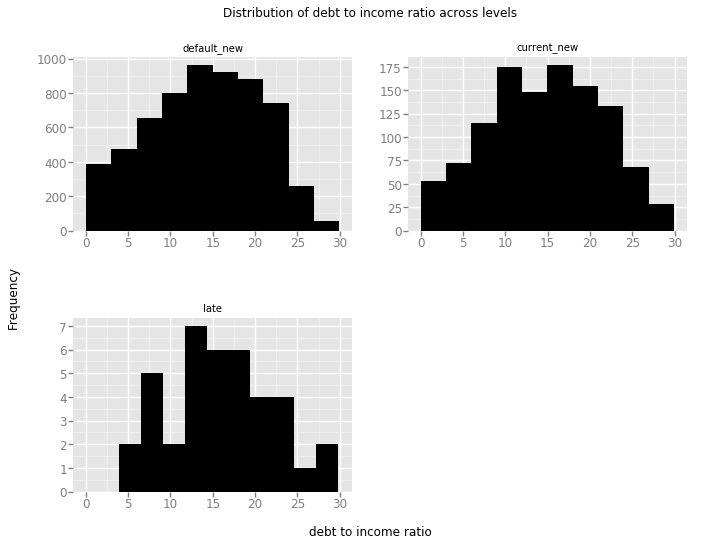

<ggplot: (87518965098)>

In [192]:
from ggplot import *
p = ggplot(aes(x="dti"), data=loan) + geom_histogram(fill = "black") + \
                        facet_wrap("loan_status_1", scales="free_y") +\
    xlab("debt to income ratio") + ylab("Frequency") + ggtitle("Distribution of debt to income ratio across levels")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


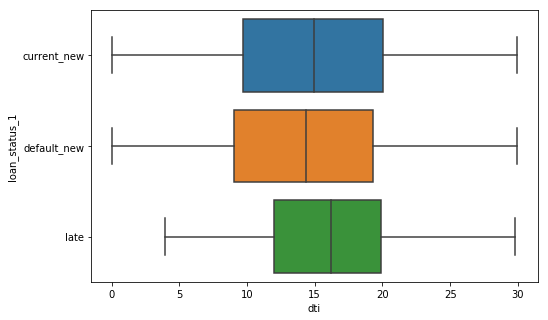

In [193]:
plot.figure(figsize=(8, 5))
sns.boxplot(x="dti", y="loan_status_1", data=loan)

#### You can see that the median of late "loan" payer is larger than other two categories

#### int_rate_grp: Make plots to show how the continuous variables vary across the three levels of int_rate_grp (High, Low and Medium)

#### 5. Annual Income V/s int_rate_grp 

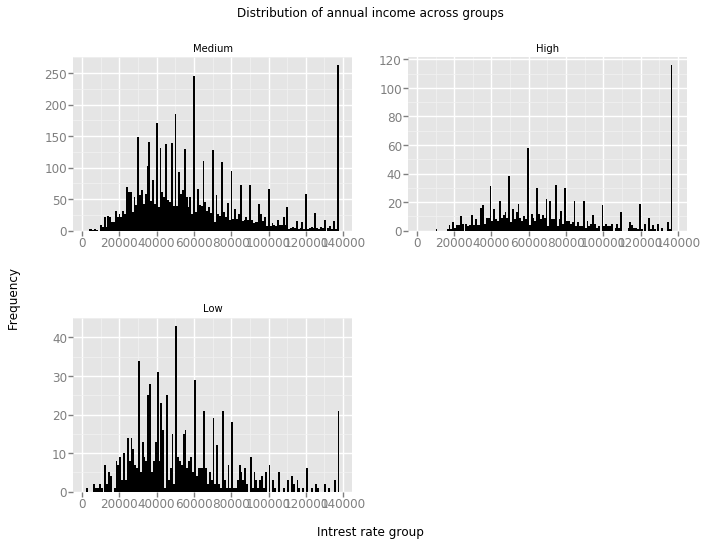

<ggplot: (87513709958)>

In [194]:
from ggplot import *
p = ggplot(aes(x="annual_inc"), data=loan) + geom_histogram(binwidth = 1000, fill = "black") + \
                        facet_wrap("int_rate_group", scales="free_y") +\
    xlab("Intrest rate group") + ylab("Frequency") + ggtitle("Distribution of annual income across groups")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'annual income')

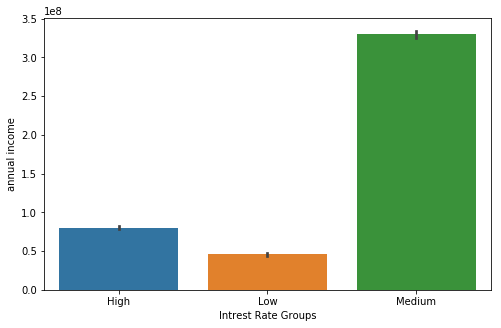

In [195]:
plot.figure(figsize=(8, 5))
sns.barplot(x="int_rate_group", y="annual_inc", data=loan,estimator=sum)
plot.xlabel("Intrest Rate Groups")
plot.ylabel("annual income")

#### 6. loan amount V/s int_rate_grp 

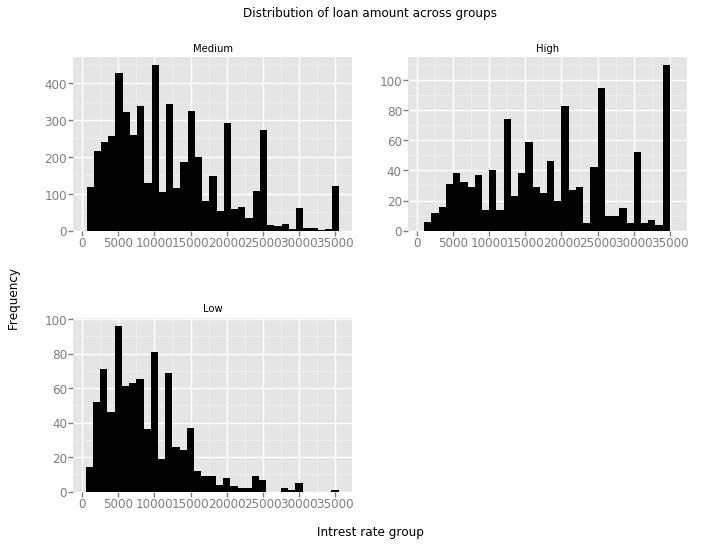

<ggplot: (87513761912)>

In [196]:
from ggplot import *
p = ggplot(aes(x="loan_amnt"), data=loan) + geom_histogram(binwidth = 1000, fill = "black") + \
                        facet_wrap("int_rate_group", scales="free_y") +\
    xlab("Intrest rate group") + ylab("Frequency") + ggtitle("Distribution of loan amount across groups")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Total loan_amnt across groups')

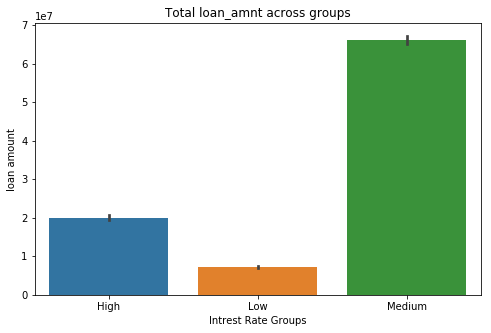

In [197]:
plot.figure(figsize=(8, 5))
sns.barplot(x="int_rate_group", y="loan_amnt", data=loan,estimator=sum)
plot.xlabel("Intrest Rate Groups")
plot.ylabel("loan amount")
plot.title("Total loan_amnt across groups")

#### 7. funded loan amount V/s int_rate_grp 

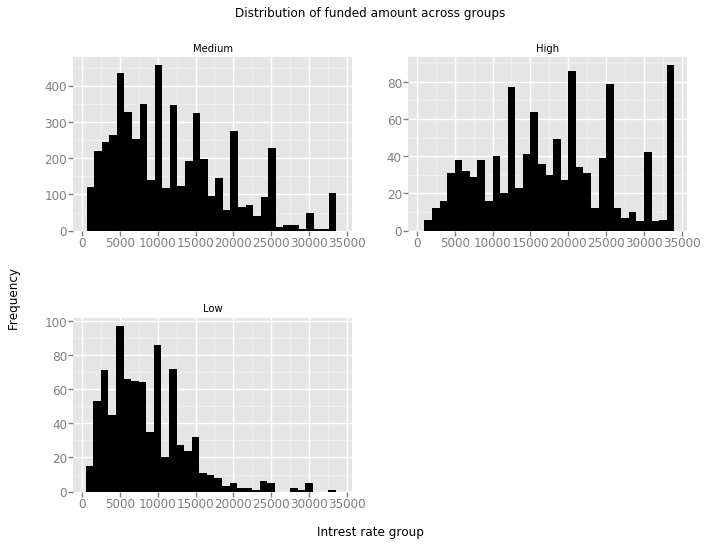

<ggplot: (87515915065)>

In [198]:
from ggplot import *
p = ggplot(aes(x="funded_amnt"), data=loan) + geom_histogram(binwidth = 1000, fill = "black") + \
                        facet_wrap("int_rate_group", scales="free_y") +\
    xlab("Intrest rate group") + ylab("Frequency") + ggtitle("Distribution of funded amount across groups")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Total funded amount across groups')

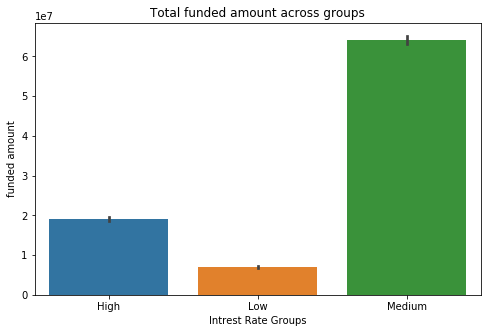

In [199]:
plot.figure(figsize=(8, 5))
sns.barplot(x="int_rate_group", y="funded_amnt", data=loan,estimator=sum)
plot.xlabel("Intrest Rate Groups")
plot.ylabel("funded amount")
plot.title("Total funded amount across groups")

#### 8. DTI V/s int_rate_grp

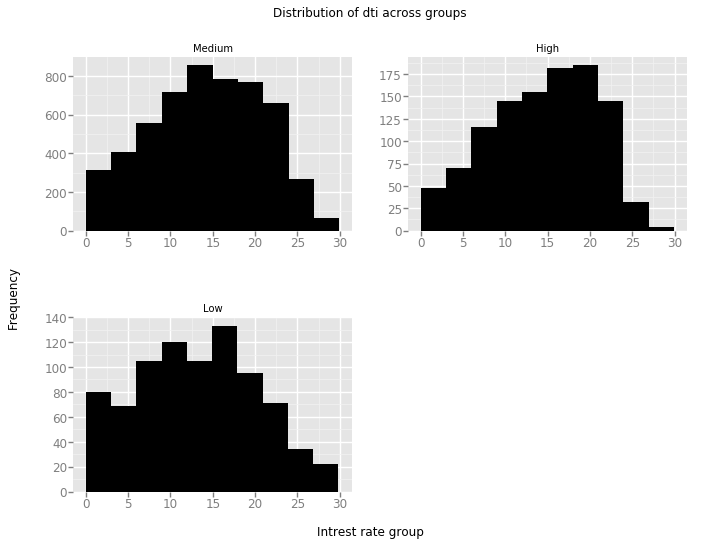

<ggplot: (87516073792)>

In [200]:
from ggplot import *
p = ggplot(aes(x="dti"), data=loan) + geom_histogram(fill = "black") + \
                        facet_wrap("int_rate_group", scales="free_y") +\
    xlab("Intrest rate group") + ylab("Frequency") + ggtitle("Distribution of dti across groups")
p

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


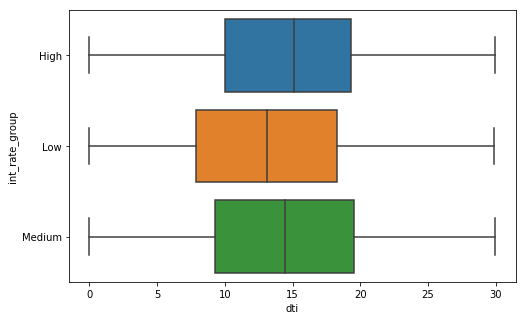

In [201]:
plot.figure(figsize=(8, 5))
sns.boxplot(x="dti", y="int_rate_group", data=loan)

# 3: Hypthesis Testing

1.	Null hypothesis: There is no significant difference in the distribution of driver variable across different levels of categorical variables

2.	Alternate hypothesis: There is significant difference in the distribution of driver variable across different levels of categorical variables

**Test hypotheses (95 % conf. level) for two levels of loan_status_1 - default_new and current_new**

In [210]:
current_new = loan.loc[loan['loan_status_1']=="current_new",]
default_new = loan.loc[loan['loan_status_1']=="default_new"]

In [213]:
from scipy import stats

In [238]:
t_test_loan_amount = stats.ttest_ind(a= current_new['loan_amnt'],
                b= default_new['loan_amnt'],
                equal_var=False)
t_test_loan_amount

Ttest_indResult(statistic=19.040649484160749, pvalue=1.6420134639404453e-72)

#### here pvalue is < 0.05, we can reject the null hypothesis.
Hence average loan_amnt of default_new and current new are different

In [241]:
t_test_funded_amnt =stats.ttest_ind(a= current_new['funded_amnt'],
                b= default_new['funded_amnt'],
                equal_var=False)
t_test_funded_amnt

Ttest_indResult(statistic=19.393874352618766, pvalue=5.5683930370197576e-75)

#### here pvalue is < 0.05, we can reject the null hypothesis. 
Hence average funded_amnt of default_new and current new are different

In [243]:
t_test_annual_income = stats.ttest_ind(a= current_new['annual_inc'],
                b= default_new['annual_inc'],
                equal_var=False)
t_test_annual_income

Ttest_indResult(statistic=11.371674286380527, pvalue=7.9439163385074888e-29)

#### here pvalue is < 0.05, we can reject the null hypothesis. 
Hence average annual_inc of default_new and current new are different

In [244]:
t_test_dti = stats.ttest_ind(a= current_new['dti'],
                b= default_new['dti'],
                equal_var=False)
t_test_dti

Ttest_indResult(statistic=3.0897397884030595, pvalue=0.00203887725406111)

#### here pvalue is < 0.05, we can reject the null hypothesis.
Hence average dti of default_new and current new are different

##  Test hypotheses (95 % conf. level) for two levels of int_rate_group - high and low

In [246]:
high_rate = loan.loc[loan['int_rate_group']=="High",]
low_rate = loan.loc[loan['int_rate_group']=="Low"]

In [249]:
t_test_funded_amnt_1 =stats.ttest_ind(a= high_rate['funded_amnt'],
                b= low_rate['funded_amnt'],
                equal_var=False)

t_test_loan_amount_1 = stats.ttest_ind(a= high_rate['loan_amnt'],
                b= low_rate['loan_amnt'],
                equal_var=False)

t_test_annual_income_1 = stats.ttest_ind(a= high_rate['annual_inc'],
                b= low_rate['annual_inc'],
                equal_var=False)

t_test_dti_1 = stats.ttest_ind(a= high_rate['dti'],
                b= low_rate['dti'],
                equal_var=False)

print(t_test_funded_amnt_1)
print(t_test_loan_amount_1)
print(t_test_annual_income_1)
print(t_test_dti_1)

Ttest_indResult(statistic=29.062766586765168, pvalue=6.7782773087430329e-153)
Ttest_indResult(statistic=28.902788902061118, pvalue=3.1763714335968626e-151)
Ttest_indResult(statistic=13.632250487058247, pvalue=1.9399366299525257e-40)
Ttest_indResult(statistic=4.364948347250273, pvalue=1.3496398187323735e-05)


#### all have  pvalue  < 0.05, we can reject the null hypothesis. 
#### Hence average annual_inc, funded_amnt, loan_amnt, dti of high_rate and low_rate are different

## As we can see from above analysis and hypothesis testing that both the groups either status or interest rate groups are different from each other in all the properties. 